In [ ]:
import pandas as pd

In [ ]:
path='/content/Product_Reviews_Fixed.csv'
df2 = pd.read_csv(path)
df2

,Product Name,Rating,Review,Date
0,Product A,2,"Horrible experience, won’t buy again.",02-Oct-2023
1,Product C,3,"Does what it claims, decent buy.",22-Mar-2023
2,Product D,3,"Could be improved, but works fine.",14-Jul-2022
3,Product A,3,"Could be improved, but works fine.",16-Nov-2022
4,Product D,1,"Disappointing, waste of money.",02-Jun-2022
5,Product D,4,Great build quality and features.,24-Nov-2022
6,Product B,3,"Does what it claims, decent buy.",27-Apr-2023
7,Product D,5,"Perfect purchase, couldn’t be happier.",29-Oct-2024
8,Product A,5,Great build quality and features.,24-Jun-2024
9,Product B,5,"Fantastic experience, totally worth it.",18-Nov-2024


from matplotlib import pyplot as plt
df2['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('Product Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df2['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df2['Product Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='Rating', y='Product Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt

In [ ]:
# Loading the pre-trained sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Analysing sentiment of text
def get_sentiment(text):
    try:
        result=sentiment_analyzer(text)
        print(f"Sentiment Result for '{text}': '{result}'")
        sentiment=result[0]['label']
        return sentiment
    except Exception as e:
        print(f"Error in Sentiment Result for '{text}': {e}")
        return 'Neutral'

In [ ]:
# Converting data into datetime format
def preprocess_review_data(file_path):
    data=pd.read_csv(file_path)
    data["Date"]=pd.to_datetime(data["Date"])
    return data

In [ ]:
# Converting sentiment label to score
def sentiment_to_score(sentiment):
    if sentiment=="POSITIVE":
        return 1
    elif sentiment=="NEGATIVE":
        return -1
    else:
        return 0

In [ ]:
# Aggregating scores by date and product name
def agg_sentiment(sentiment_df):
    sentiment_df['sentiment_score']=sentiment_df['sentiment'].apply(sentiment_to_score)
    sentiment_agg=sentiment_df.groupby(['Date', 'Product Name'])['sentiment_score'].mean().reset_index()
    return sentiment_agg

In [ ]:
def main(file_path):
#     Loading and preprocessing
    review_data = preprocess_review_data(file_path)

#     Sentiment Analysis on each review
    review_data['sentiment']=review_data['Review'].apply(get_sentiment)

#     Aggregating sentiment scores by date and product name
    sentiment_agg = agg_sentiment(review_data)

In [ ]:
out = main(path)
df=pd.DataFrame(out)
df.to_csv('sentiment_analysis_final.csv', index=False)

Sentiment Result for 'Horrible experience, won’t buy again.': '[{'label': 'NEGATIVE', 'score': 0.9988030195236206}]'
Sentiment Result for 'Does what it claims, decent buy.': '[{'label': 'POSITIVE', 'score': 0.9994389414787292}]'
Sentiment Result for 'Could be improved, but works fine.': '[{'label': 'POSITIVE', 'score': 0.9997146725654602}]'
Sentiment Result for 'Could be improved, but works fine.': '[{'label': 'POSITIVE', 'score': 0.9997146725654602}]'
Sentiment Result for 'Disappointing, waste of money.': '[{'label': 'NEGATIVE', 'score': 0.9997943043708801}]'
Sentiment Result for 'Great build quality and features.': '[{'label': 'POSITIVE', 'score': 0.9998800754547119}]'
Sentiment Result for 'Does what it claims, decent buy.': '[{'label': 'POSITIVE', 'score': 0.9994389414787292}]'
Sentiment Result for 'Perfect purchase, couldn’t be happier.': '[{'label': 'POSITIVE', 'score': 0.9988248944282532}]'
Sentiment Result for 'Great build quality and features.': '[{'label': 'POSITIVE', 'score':

In [ ]:
def main(file_path):
    # Load and preprocess review data
    review_data = preprocess_review_data(file_path)

    # Perform sentiment analysis on each review
    review_data['sentiment'] = review_data['Review'].apply(get_sentiment)

    return review_data


Sentiment Result for 'Horrible experience, won’t buy again.': '[{'label': 'NEGATIVE', 'score': 0.9988030195236206}]'
Sentiment Result for 'Does what it claims, decent buy.': '[{'label': 'POSITIVE', 'score': 0.9994389414787292}]'
Sentiment Result for 'Could be improved, but works fine.': '[{'label': 'POSITIVE', 'score': 0.9997146725654602}]'
Sentiment Result for 'Could be improved, but works fine.': '[{'label': 'POSITIVE', 'score': 0.9997146725654602}]'
Sentiment Result for 'Disappointing, waste of money.': '[{'label': 'NEGATIVE', 'score': 0.9997943043708801}]'
Sentiment Result for 'Great build quality and features.': '[{'label': 'POSITIVE', 'score': 0.9998800754547119}]'
Sentiment Result for 'Does what it claims, decent buy.': '[{'label': 'POSITIVE', 'score': 0.9994389414787292}]'
Sentiment Result for 'Perfect purchase, couldn’t be happier.': '[{'label': 'POSITIVE', 'score': 0.9988248944282532}]'
Sentiment Result for 'Great build quality and features.': '[{'label': 'POSITIVE', 'score':

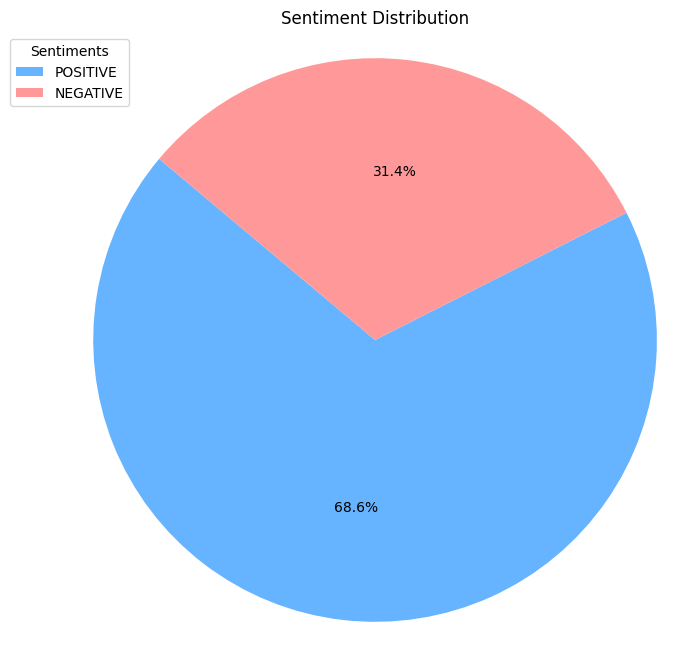

In [ ]:
# Run the main function and store the result in a global variable
review_data = main(path)

# Count sentiments for the pie chart
sentiment_counts = review_data['sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sentiment_counts,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff', '#ff9999', '#99ff99']
)

# Add a legend in the upper left corner
plt.legend(
    wedges,
    sentiment_counts.index,
    title="Sentiments",
    loc="upper left",
    bbox_to_anchor=(-0.1, 1.0)
)

plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()


In [ ]:
# Plotting sentiment trend for each product
def line_plot_sentiment(sentiment_agg, product_name, filename='Sentiment_Analysis_lineplot.png'):
    product_data=sentiment_agg[sentiment_agg['Product Name']==product_name]
    plt.figure(figsize=(10,6))
    plt.plot(product_data['Date'], product_data['sentiment_score'], marker='x', label='Product Name')
    plt.xlabel('Date')
    plt.ylabel('Avg Sentiment Score')
    plt.title(f"Sentiment Trend over time for {product_name}")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

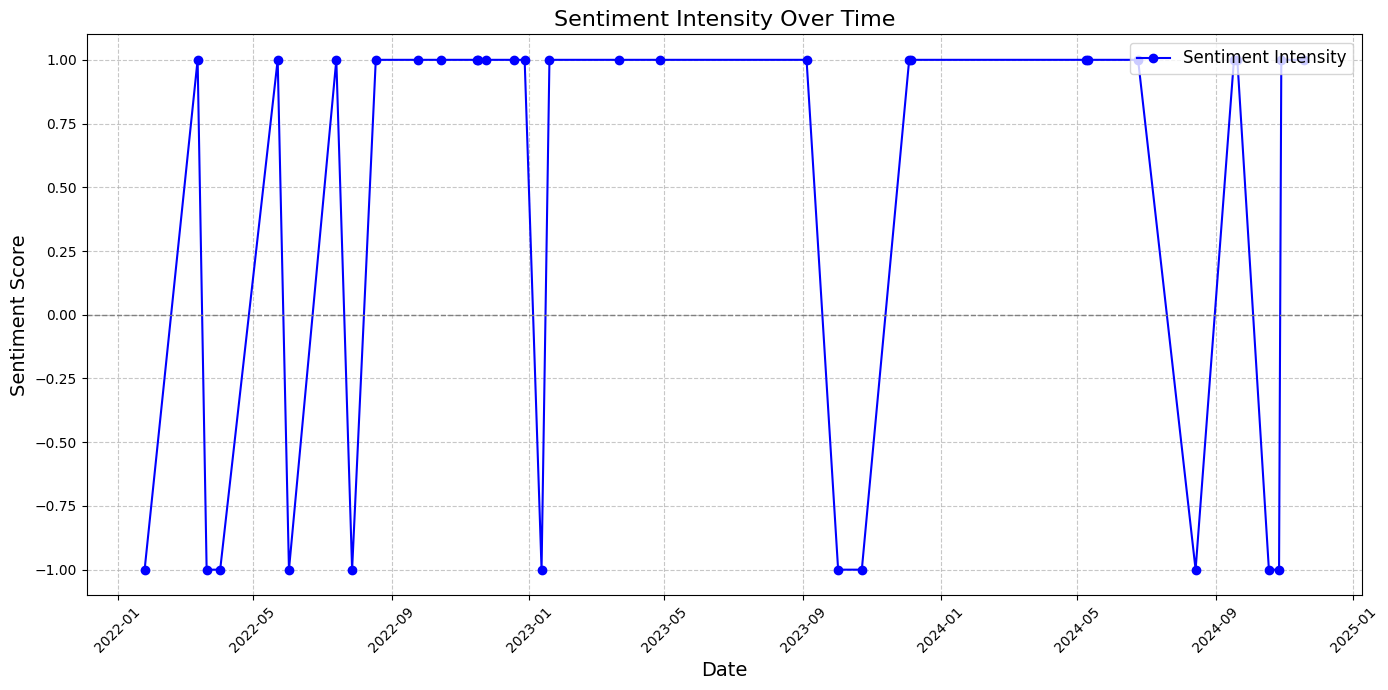

In [ ]:
# Ensure the 'Date' column is in datetime format (if not already)
review_data['Date'] = pd.to_datetime(review_data['Date'])

# Convert sentiment labels to scores for intensity
def sentiment_to_score(sentiment):
    if sentiment == "POSITIVE":
        return 1
    elif sentiment == "NEGATIVE":
        return -1
    else:
        return 0

# Apply sentiment-to-score conversion
review_data['sentiment_score'] = review_data['sentiment'].apply(sentiment_to_score)

# Sort data by date (optional, ensures chronological order)
review_data = review_data.sort_values(by='Date')

# Plot sentiment intensity line chart
plt.figure(figsize=(14, 7))
plt.plot(
    review_data['Date'],
    review_data['sentiment_score'],
    marker='o',
    linestyle='-',
    color='b',
    label='Sentiment Intensity'
)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Add a baseline at 0
plt.title("Sentiment Intensity Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Sentiment Score", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
